### Доверительный интервал для среднего нормальной популяции

Случай 1 - если дисперсия известна

In [1]:
import numpy as np
from scipy.stats import norm

np.random.seed(1)
n = 25
mu_true = 5.0
sigma = 2.0  # известно
data = np.random.normal(loc=mu_true, scale=sigma, size=n)
xbar = data.mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)
ci_lower = xbar - z * sigma / np.sqrt(n)
ci_upper = xbar + z * sigma / np.sqrt(n)
print(f"x̄ = {xbar:.3f}, {100*(1-alpha):.0f}% CI = [{ci_lower:.3f}, {ci_upper:.3f}]")

x̄ = 4.975, 95% CI = [4.191, 5.759]


Случай 2 - если дисперсия неизвестна

In [2]:
from scipy.stats import t

s = data.std(ddof=1)
t_q = t.ppf(1 - alpha/2, df=n-1)
ci_t = (xbar - t_q * s / np.sqrt(n), xbar + t_q * s / np.sqrt(n))
print(f"{100*(1-alpha):.0f}% t-CI = [{ci_t[0]:.3f}, {ci_t[1]:.3f}]")

95% t-CI = [4.068, 5.881]


#### Интервалы для дисперсии

In [3]:
from scipy.stats import chi2

chi2_low = chi2.ppf(alpha/2, df=n-1)
chi2_high = chi2.ppf(1-alpha/2, df=n-1)
ci_var = ((n-1)*s*s / chi2_high, (n-1)*s*s / chi2_low)
ci_sigma = (np.sqrt(ci_var[0]), np.sqrt(ci_var[1]))
print(f"CI for sigma^2: [{ci_var[0]:.3f}, {ci_var[1]:.3f}]")
print(f"CI for sigma: [{ci_sigma[0]:.3f}, {ci_sigma[1]:.3f}]")

CI for sigma^2: [2.941, 9.335]
CI for sigma: [1.715, 3.055]


#### Интервалы для доли
Встроенных методов нет, реализация вручную

In [5]:
from scipy.stats import norm

k = 45       # число успехов
n = 100      # число испытаний
alpha = 0.05 # уровень значимости

# Квантиль нормального распределения
z = norm.ppf(1 - alpha/2)

# Wald-интервал
p_hat = k / n
wald_lower = p_hat - z * np.sqrt(p_hat * (1 - p_hat) / n)
wald_upper = p_hat + z * np.sqrt(p_hat * (1 - p_hat) / n)

# Agresti-Coull-интервал
n_tilde = n + z**2
p_tilde = (k + z**2 / 2) / n_tilde
agresti_lower = p_tilde - z * np.sqrt(p_tilde * (1 - p_tilde) / n_tilde)
agresti_upper = p_tilde + z * np.sqrt(p_tilde * (1 - p_tilde) / n_tilde)
print(agresti_lower)
agresti_upper


0.3561281682620399


np.float64(0.5475711815586586)

#### Бутстрэп-интервалы

In [6]:
def bootstrap_ci(data, statfunc=np.mean, B=2000, alpha=0.05):
    n = len(data)
    boot_stats = np.empty(B)
    for i in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        boot_stats[i] = statfunc(sample)
    lo = np.quantile(boot_stats, alpha/2)
    hi = np.quantile(boot_stats, 1-alpha/2)
    return lo, hi

ci_boot = bootstrap_ci(data, statfunc=np.mean, B=5000)
print("Bootstrap percentile CI:", ci_boot)

Bootstrap percentile CI: (np.float64(4.131651617565472), np.float64(5.824553738938231))


#### Задачи

Задача 1. Сгенерирована выборка размера n=25 из N (5, 2^2) (seed = 1). Если использовать z-доверительный интервал для  при известной  и уровне доверия 95%, то какая из следующих границ верна?

In [13]:
mu = 5        
sigma = 2     
n = 25
np.random.seed(1)
sample = np.random.normal(mu, sigma, n) 

xbar = sample.mean()
print(f"Среднее выборки: {xbar:.4f}")

alpha = 0.05
z = norm.ppf(1 - alpha/2)  # ≈ 1.96
se = sigma / np.sqrt(n)    # 2 / 5 = 0.4

ci_lower = xbar - z * se
ci_upper = xbar + z * se

print(f"z = {z:.4f}")
print(f"SE = σ/√n = {sigma}/{np.sqrt(n)} = {se:.4f}")
print(f"95% ДИ: [{ci_lower:.4f}, {ci_upper:.4f}]")


Среднее выборки: 4.9745
z = 1.9600
SE = σ/√n = 2/5.0 = 0.4000
95% ДИ: [4.1906, 5.7585]


Задача 2. 

In [12]:
s = 3.78**0.5

chi2_low = chi2.ppf(alpha/2, df=n-1)
chi2_high = chi2.ppf(1-alpha/2, df=n-1)
ci_var = ((n-1)*s*s / chi2_high, (n-1)*s*s / chi2_low)
ci_sigma = (np.sqrt(ci_var[0]), np.sqrt(ci_var[1]))
print(f"CI for sigma^2: [{ci_var[0]:.3f}, {ci_var[1]:.3f}]")
print(f"CI for sigma: [{ci_sigma[0]:.3f}, {ci_sigma[1]:.3f}]")

CI for sigma^2: [2.305, 7.315]
CI for sigma: [1.518, 2.705]


In [14]:

# Параметры логнормального распределения
meanlog = 0.5
sdlog = 0.8
n = 50
B = 5000
np.random.seed(0)

# 1. Генерация выборки из логнормального распределения
data = np.random.lognormal(meanlog, sdlog, n)

# 2. a) Асимптотический CI по ЦПТ
x_bar = np.mean(data)  # выборочное среднее
s = np.std(data, ddof=1)  # выборочное стандартное отклонение
z = norm.ppf(0.975)  # 1.96 для 95% ДИ
se_clt = s / np.sqrt(n)

ci_clt_lower = x_bar - z * se_clt
ci_clt_upper = x_bar + z * se_clt

print(f"Выборочное среднее: {x_bar:.3f}")
print(f"CLT 95% CI: [{ci_clt_lower:.3f}, {ci_clt_upper:.3f}]")

# 3. b) Bootstrap percentile CI
bootstrap_means = []
for _ in range(B):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Percentile method
alpha = 0.05
ci_boot_lower = np.percentile(bootstrap_means, 100 * alpha/2)
ci_boot_upper = np.percentile(bootstrap_means, 100 * (1 - alpha/2))

print(f"Bootstrap 95% CI: [{ci_boot_lower:.3f}, {ci_boot_upper:.3f}]")
print(f"Нижняя граница bootstrap CI (окр. до 2 знаков): {ci_boot_lower:.2f}")

Выборочное среднее: 2.691
CLT 95% CI: [2.019, 3.362]
Bootstrap 95% CI: [2.077, 3.400]
Нижняя граница bootstrap CI (окр. до 2 знаков): 2.08


## Доверительные интервалы для параметров нормального распределения

#### Проверка покрытия через симуляцию

Рассмотрим на Python симуляцию покрытия t-интервала

In [1]:
import numpy as np
from scipy.stats import t, norm

def empirical_coverage_t(mu=0, sigma=1, n=10, alpha=0.05, B=5000, seed=0):
    rng = np.random.default_rng(seed)
    contains = 0
    for _ in range(B):
        x = rng.normal(loc=mu, scale=sigma, size=n)
        xbar = x.mean()
        s = x.std(ddof=1)
        t_q = t.ppf(1-alpha/2, df=n-1)
        lo = xbar - t_q * s / np.sqrt(n)
        hi = xbar + t_q * s / np.sqrt(n)
        if lo <= mu <= hi:
            contains += 1
    return contains / B

print("Empirical coverage (n=10):", empirical_coverage_t(n=10))
print("Empirical coverage (n=30):", empirical_coverage_t(n=30))

Empirical coverage (n=10): 0.9488
Empirical coverage (n=30): 0.9458


Примеры на Python
Сгенерируем выборку и рассмотрим сквозные примеры применения всех изученных методов на Python:

In [2]:
from scipy.stats import norm, t, chi2, f

np.random.seed(42)

# Параметры
n = 20
mu_true = 2.5
sigma_true = 1.7
alpha = 0.05

# сгенерируем выборку
x = np.random.normal(loc=mu_true, scale=sigma_true, size=n)
xbar = x.mean()
s = x.std(ddof=1)

# 1) z-interval (если sigma известно)
zq = norm.ppf(1-alpha/2)
ci_z = (xbar - zq * sigma_true/np.sqrt(n), xbar + zq * sigma_true/np.sqrt(n))
print("z-CI (sigma known):", ci_z)

# 2) t-interval (sigma unknown)
tq = t.ppf(1-alpha/2, df=n-1)
ci_t = (xbar - tq * s/np.sqrt(n), xbar + tq * s/np.sqrt(n))
print("t-CI (sigma unknown):", ci_t)

# 3) CI for sigma^2 via chi2
chi_low = chi2.ppf(alpha/2, df=n-1)
chi_high = chi2.ppf(1-alpha/2, df=n-1)
ci_var = ((n-1)*s*s/chi_high, (n-1)*s*s/chi_low)
ci_sigma = (np.sqrt(ci_var[0]), np.sqrt(ci_var[1]))
print("CI for sigma^2:", ci_var)
print("CI for sigma:", ci_sigma)

# 4) Prediction interval for a single future observation
pred_halfwidth = tq * s * np.sqrt(1 + 1/n)
pred_interval = (xbar - pred_halfwidth, xbar + pred_halfwidth)
print("Prediction interval for next obs:", pred_interval)

z-CI (sigma known): (np.float64(1.4637482860587958), np.float64(2.953836605038984))
t-CI (sigma unknown): (np.float64(1.4449703214786414), np.float64(2.9726145696191386))
CI for sigma^2: (np.float64(1.5404708668001819), np.float64(5.682137628043295))
CI for sigma: (np.float64(1.2411570677396886), np.float64(2.3837234797776556))
Prediction interval for next obs: (np.float64(-1.2914802554849762), np.float64(5.709065146582756))


Упражнения 4.1.-4.2

In [3]:
import numpy as np
from scipy import stats

# Устанавливаем seed для воспроизводимости
np.random.seed(42)

# Генерация выборок
x1 = np.random.normal(loc=2, scale=1, size=12)
x2 = np.random.normal(loc=2.5, scale=1.3, size=18)

print(f"Разность выборочных средних: {np.mean(x1) - np.mean(x2):.4f}")

# Вычисляем параметры для формулы Уэлча
n1, n2 = len(x1), len(x2)
mean1, mean2 = np.mean(x1), np.mean(x2)
var1, var2 = np.var(x1, ddof=1), np.var(x2, ddof=1)  # несмещенные оценки дисперсий

# Стандартная ошибка разности средних (формула Уэлча)
se = np.sqrt(var1/n1 + var2/n2)

# Вычисляем степени свободы Уэлча
df_numerator = (var1/n1 + var2/n2)**2
df_denominator = (var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1)
df_welch = df_numerator / df_denominator

print(f"\nСтепени свободы Уэлча: {df_welch:.2f}")

# Критическое значение t-распределения для 95% доверительного интервала
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df_welch)

print(f"t-критическое для 95% ДИ: {t_critical:.4f}")

# Вычисляем доверительный интервал
diff = mean1 - mean2  # разность средних
margin = t_critical * se  # погрешность

ci_lower = diff - margin
ci_upper = diff + margin

print(f"\n95% доверительный интервал для разности средних (μ1 - μ2):")
print(f"Нижняя граница: {ci_lower:.4f}")
print(f"Верхняя граница: {ci_upper:.4f}")
print(f"Ширина интервала: {2*margin:.4f}")

# Проверка с помощью встроенной функции scipy
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(x1, x2, equal_var=False)  # equal_var=False для Уэлча
print(f"\nПроверка scipy.stats.ttest_ind (equal_var=False):")
print(f"t-статистика: {t_stat:.4f}, p-value: {p_value:.4f}")

# Для получения доверительного интервала из scipy
ci_scipy = stats.t.interval(1-alpha, df_welch, loc=diff, scale=se)
print(f"Доверительный интервал scipy: ({ci_scipy[0]:.4f}, {ci_scipy[1]:.4f})")

print(f"\nОТВЕТ: Нижняя граница 95% ДИ (округлено до 2 знаков): {ci_lower:.2f}")

Разность выборочных средних: 0.4601

Степени свободы Уэлча: 28.00
t-критическое для 95% ДИ: 2.0484

95% доверительный интервал для разности средних (μ1 - μ2):
Нижняя граница: -0.2386
Верхняя граница: 1.1588
Ширина интервала: 1.3975

Проверка scipy.stats.ttest_ind (equal_var=False):
t-статистика: 1.3488, p-value: 0.1882
Доверительный интервал scipy: (-0.2386, 1.1588)

ОТВЕТ: Нижняя граница 95% ДИ (округлено до 2 знаков): -0.24


Упражнения 5.1-5.2

In [4]:
import numpy as np
from scipy import stats

# Устанавливаем seed для воспроизводимости (как в упражнении 4)
np.random.seed(42)

# Генерация выборок (те же данные, что и в упражнении 4)
x1 = np.random.normal(loc=2, scale=1, size=12)
x2 = np.random.normal(loc=2.5, scale=1.3, size=18)

# Выборочные дисперсии (несмещенные оценки)
var1 = np.var(x1, ddof=1)  # s1²
var2 = np.var(x2, ddof=1)  # s2²

print(f"Выборка 1: n={len(x1)}, выборочная дисперсия s1² = {var1:.4f}")
print(f"Выборка 2: n={len(x2)}, выборочная дисперсия s2² = {var2:.4f}")
print(f"Отношение выборочных дисперсий s1²/s2² = {var1/var2:.4f}")

# Степени свободы
n1, n2 = len(x1), len(x2)
df1 = n1 - 1  # степени свободы для числителя
df2 = n2 - 1  # степени свободы для знаменателя

print(f"\nСтепени свободы: df1 = {df1}, df2 = {df2}")

# Уровень значимости и доверительная вероятность
alpha = 0.05
confidence = 1 - alpha

# Критические значения F-распределения
# F-статистика для отношения дисперсий: F = s1²/s2² * (σ2²/σ1²)
# Но для ДИ нам нужны квантили F-распределения

F_lower = stats.f.ppf(alpha/2, df1, df2)      # нижний 2.5% квантиль
F_upper = stats.f.ppf(1 - alpha/2, df1, df2)  # верхний 97.5% квантиль

print(f"\nКритические значения F-распределения:")
print(f"F({alpha/2:.3f}; {df1},{df2}) = {F_lower:.4f}")
print(f"F({1-alpha/2:.3f}; {df1},{df2}) = {F_upper:.4f}")

# Доверительный интервал для отношения σ1²/σ2²
# Формула: (s1²/s2²) * (1/F_upper) ≤ σ1²/σ2² ≤ (s1²/s2²) * (1/F_lower)

sample_ratio = var1 / var2

ci_lower = sample_ratio * (1 / F_upper)
ci_upper = sample_ratio * (1 / F_lower)

print(f"\n95% доверительный интервал для отношения дисперсий σ1²/σ2²:")
print(f"Нижняя граница: {ci_lower:.4f}")
print(f"Верхняя граница: {ci_upper:.4f}")

# Альтернативный способ вычисления через scipy
ci_lower_alt = sample_ratio / F_upper
ci_upper_alt = sample_ratio / F_lower

print(f"\nПроверка альтернативным расчётом:")
print(f"Нижняя граница: {ci_lower_alt:.4f}")
print(f"Верхняя граница: {ci_upper_alt:.4f}")

# Округление до двух знаков
print(f"\nОТВЕТ: Нижняя граница 95% ДИ для σ1²/σ2² (округлено до 2 знаков): {ci_lower:.2f}")

# Дополнительная информация: проверка гипотезы о равенстве дисперсий
print(f"\n--- Дополнительно: Проверка гипотезы о равенстве дисперсий ---")
# F-статистика для теста равенства дисперсий
F_stat = var1 / var2  # если σ1² = σ2², то F ~ F(df1, df2)
p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1 - stats.f.cdf(F_stat, df1, df2))

print(f"F-статистика: {F_stat:.4f}")
print(f"p-value для H0: σ1² = σ2²: {p_value:.4f}")

if p_value < alpha:
    print(f"Гипотеза о равенстве дисперсий отвергается на уровне {alpha} (p < {alpha})")
else:
    print(f"Нет оснований отвергать гипотезу о равенстве дисперсий (p ≥ {alpha})")

Выборка 1: n=12, выборочная дисперсия s1² = 0.5539
Выборка 2: n=18, выборочная дисперсия s2² = 1.2636
Отношение выборочных дисперсий s1²/s2² = 0.4384

Степени свободы: df1 = 11, df2 = 17

Критические значения F-распределения:
F(0.025; 11,17) = 0.3047
F(0.975; 11,17) = 2.8696

95% доверительный интервал для отношения дисперсий σ1²/σ2²:
Нижняя граница: 0.1528
Верхняя граница: 1.4385

Проверка альтернативным расчётом:
Нижняя граница: 0.1528
Верхняя граница: 1.4385

ОТВЕТ: Нижняя граница 95% ДИ для σ1²/σ2² (округлено до 2 знаков): 0.15

--- Дополнительно: Проверка гипотезы о равенстве дисперсий ---
F-статистика: 0.4384
p-value для H0: σ1² = σ2²: 0.1671
Нет оснований отвергать гипотезу о равенстве дисперсий (p ≥ 0.05)


### Асимптотический доверительный интервал

Упражнение 4

Исходная выборка: n = 40
Первые 10 наблюдений: [0.53058301 0.83728718 0.6154821  0.52480077 0.36736566 0.6921062
 0.38367947 1.48234961 2.20994145 0.3224014 ]
Среднее выборки: 0.7740

Оценка λ по исходной выборке (λ̂): 1.2921
Истинное значение λ: 1.5

Bootstrap выполнено: 5000 итераций
Среднее bootstrap оценок: 1.3091
Стандартное отклонение bootstrap оценок: 0.1640

Percentile Bootstrap 95% доверительный интервал:
Нижняя граница: 1.0257
Верхняя граница: 1.6613

Normal Bootstrap 95% доверительный интервал:
Нижняя граница: 0.9706
Верхняя граница: 1.6135

ОТВЕТ: Нижняя граница percentile bootstrap CI (округлено до 1 знака): 1.0


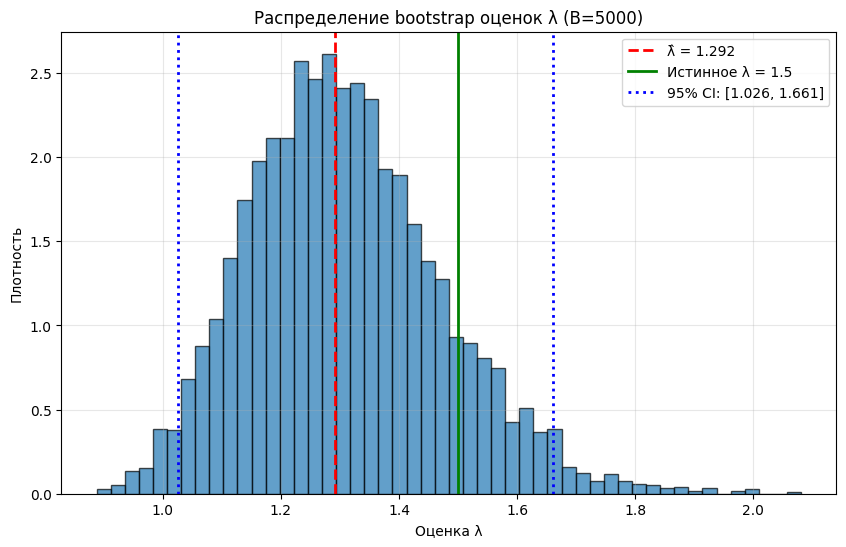


--- Дополнительно: Классический асимптотический подход ---
Асимптотический 95% ДИ: (0.8916, 1.6925)


In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Устанавливаем seed для воспроизводимости
np.random.seed(0)

# Параметры
n = 40
true_lambda = 1.5
B = 5000  # количество bootstrap выборок

# Генерация исходной выборки из Exp(λ=1.5)
# Напоминание: для экспоненциального распределения scale = 1/λ
data = np.random.exponential(scale=1/true_lambda, size=n)

print(f"Исходная выборка: n = {n}")
print(f"Первые 10 наблюдений: {data[:10]}")
print(f"Среднее выборки: {np.mean(data):.4f}")

# Оценка λ по исходной выборке (MLE для экспоненциального распределения)
# Для Exp(λ): λ̂ = 1 / x̄
lambda_hat = 1 / np.mean(data)
print(f"\nОценка λ по исходной выборке (λ̂): {lambda_hat:.4f}")
print(f"Истинное значение λ: {true_lambda}")

# Bootstrap процедура
bootstrap_lambdas = np.zeros(B)

for i in range(B):
    # Генерируем bootstrap выборку (с возвращением)
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    
    # Оцениваем λ для bootstrap выборки
    bootstrap_lambdas[i] = 1 / np.mean(bootstrap_sample)

print(f"\nBootstrap выполнено: {B} итераций")
print(f"Среднее bootstrap оценок: {np.mean(bootstrap_lambdas):.4f}")
print(f"Стандартное отклонение bootstrap оценок: {np.std(bootstrap_lambdas, ddof=1):.4f}")

# Percentile bootstrap доверительный интервал (95%)
alpha = 0.05
lower_percentile = np.percentile(bootstrap_lambdas, 100 * alpha/2)
upper_percentile = np.percentile(bootstrap_lambdas, 100 * (1 - alpha/2))

print(f"\nPercentile Bootstrap 95% доверительный интервал:")
print(f"Нижняя граница: {lower_percentile:.4f}")
print(f"Верхняя граница: {upper_percentile:.4f}")

# Также построим normal bootstrap CI для сравнения
bootstrap_se = np.std(bootstrap_lambdas, ddof=1)  # стандартная ошибка из bootstrap
z = stats.norm.ppf(1 - alpha/2)
lower_normal = lambda_hat - z * bootstrap_se
upper_normal = lambda_hat + z * bootstrap_se

print(f"\nNormal Bootstrap 95% доверительный интервал:")
print(f"Нижняя граница: {lower_normal:.4f}")
print(f"Верхняя граница: {upper_normal:.4f}")

# Округление до 1 знака (как требуется в задаче)
print(f"\nОТВЕТ: Нижняя граница percentile bootstrap CI (округлено до 1 знака): {lower_percentile:.1f}")

# Визуализация распределения bootstrap оценок
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_lambdas, bins=50, alpha=0.7, edgecolor='black', density=True)
plt.axvline(lambda_hat, color='red', linestyle='--', linewidth=2, label=f'λ̂ = {lambda_hat:.3f}')
plt.axvline(true_lambda, color='green', linestyle='-', linewidth=2, label=f'Истинное λ = {true_lambda}')
plt.axvline(lower_percentile, color='blue', linestyle=':', linewidth=2, label=f'95% CI: [{lower_percentile:.3f}, {upper_percentile:.3f}]')
plt.axvline(upper_percentile, color='blue', linestyle=':', linewidth=2)

plt.xlabel('Оценка λ')
plt.ylabel('Плотность')
plt.title(f'Распределение bootstrap оценок λ (B={B})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Дополнительно: базовая оценка через MLE с асимптотическим CI
print(f"\n--- Дополнительно: Классический асимптотический подход ---")
# Для экспоненциального распределения: λ̂ ~ N(λ, λ²/n) асимптотически
se_classic = lambda_hat / np.sqrt(n)  # асимптотическая стандартная ошибка
lower_classic = lambda_hat - z * se_classic
upper_classic = lambda_hat + z * se_classic
print(f"Асимптотический 95% ДИ: ({lower_classic:.4f}, {upper_classic:.4f})")

In [ ]:
import numpy as np
from scipy import stats

# Устанавливаем seed для воспроизводимости
np.random.seed(0)

# Параметры
lambda1_true = 2.0
lambda2_true = 3.0
n1 = 25
n2 = 30

# Генерация выборок из экспоненциальных распределений
# Для np.random.exponential: scale = 1/λ
X1 = np.random.exponential(scale=1/lambda1_true, size=n1)
X2 = np.random.exponential(scale=1/lambda2_true, size=n2)

print(f"Выборка 1: n={n1}, истинное λ₁={lambda1_true}")
print(f"Выборка 2: n={n2}, истинное λ₂={lambda2_true}")
print(f"Истинное значение θ = λ₁/λ₂ = {lambda1_true/lambda2_true:.4f}")

# Оценки параметров (MLE для экспоненциального распределения)
lambda1_hat = 1 / np.mean(X1)  # λ̂₁ = 1/x̄₁
lambda2_hat = 1 / np.mean(X2)  # λ̂₂ = 1/x̄₂

# Оценка интересующего параметра θ = λ₁/λ₂
theta_hat = lambda1_hat / lambda2_hat

print(f"\nОценки параметров:")
print(f"λ̂₁ = 1/mean(X1) = 1/{np.mean(X1):.4f} = {lambda1_hat:.4f}")
print(f"λ̂₂ = 1/mean(X2) = 1/{np.mean(X2):.4f} = {lambda2_hat:.4f}")
print(f"θ̂ = λ̂₁/λ̂₂ = {theta_hat:.4f}")

# Дельта-метод для оценки дисперсии θ̂ = λ̂₁/λ̂₂

# 1. Асимптотические дисперсии λ̂₁ и λ̂₂
# Для экспоненциального распределения: Var(λ̂) ≈ λ²/n (MLE асимптотическая дисперсия)
var_lambda1_hat = lambda1_hat**2 / n1
var_lambda2_hat = lambda2_hat**2 / n2

print(f"\nАсимптотические дисперсии:")
print(f"Var(λ̂₁) ≈ λ̂₁²/n₁ = {lambda1_hat**2:.4f}/{n1} = {var_lambda1_hat:.6f}")
print(f"Var(λ̂₂) ≈ λ̂₂²/n₂ = {lambda2_hat**2:.4f}/{n2} = {var_lambda2_hat:.6f}")

# 2. Градиент функции g(λ₁, λ₂) = λ₁/λ₂
# ∂g/∂λ₁ = 1/λ₂
# ∂g/∂λ₂ = -λ₁/λ₂²

grad_lambda1 = 1 / lambda2_hat          # ∂g/∂λ₁
grad_lambda2 = -lambda1_hat / (lambda2_hat**2)  # ∂g/∂λ₂

print(f"\nГрадиент функции g(λ₁, λ₂) = λ₁/λ₂:")
print(f"∂g/∂λ₁ = 1/λ₂ = 1/{lambda2_hat:.4f} = {grad_lambda1:.4f}")
print(f"∂g/∂λ₂ = -λ₁/λ₂² = -{lambda1_hat:.4f}/{lambda2_hat**2:.4f} = {grad_lambda2:.4f}")

# 3. Дельта-метод: Var(θ̂) ≈ ∇gᵀ · Σ · ∇g
# Так как выборки независимы, ковариация = 0
var_theta_hat = (
    grad_lambda1**2 * var_lambda1_hat + 
    grad_lambda2**2 * var_lambda2_hat
)

se_theta_hat = np.sqrt(var_theta_hat)

print(f"\nДельта-метод:")
print(f"Var(θ̂) ≈ (∂g/∂λ₁)²·Var(λ̂₁) + (∂g/∂λ₂)²·Var(λ̂₂)")
print(f"       = ({grad_lambda1:.4f})²·{var_lambda1_hat:.6f} + ({grad_lambda2:.4f})²·{var_lambda2_hat:.6f}")
print(f"       = {var_theta_hat:.6f}")
print(f"SE(θ̂) = √{var_theta_hat:.6f} = {se_theta_hat:.6f}")

# 4. Асимптотический доверительный интервал (Wald)
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)  # 1.96 для 95% ДИ

ci_lower = theta_hat - z * se_theta_hat
ci_upper = theta_hat + z * se_theta_hat

print(f"\n95% асимптотический доверительный интервал для θ = λ₁/λ₂:")
print(f"θ̂ ± z·SE(θ̂) = {theta_hat:.4f} ± {z:.3f}·{se_theta_hat:.4f}")
print(f"Нижняя граница: {ci_lower:.4f}")
print(f"Верхняя граница: {ci_upper:.4f}")

# Округление до 2 знаков (как требуется в задаче)
print(f"\nОТВЕТ: Верхняя граница CI (округлено до 2 знаков): {ci_upper:.2f}")

# 5. Проверка через бутстрэп для сравнения
print(f"\n--- Проверка через bootstrap (для сравнения) ---")
B = 10000
bootstrap_thetas = np.zeros(B)

for i in range(B):
    # Bootstrap выборки
    boot_X1 = np.random.choice(X1, size=n1, replace=True)
    boot_X2 = np.random.choice(X2, size=n2, replace=True)
    
    # Оценки параметров
    boot_lambda1 = 1 / np.mean(boot_X1)
    boot_lambda2 = 1 / np.mean(boot_X2)
    
    # Оценка θ
    bootstrap_thetas[i] = boot_lambda1 / boot_lambda2

# Percentile bootstrap CI
boot_lower = np.percentile(bootstrap_thetas, 100 * alpha/2)
boot_upper = np.percentile(bootstrap_thetas, 100 * (1 - alpha/2))

print(f"Bootstrap 95% CI (percentile): ({boot_lower:.4f}, {boot_upper:.4f})")
print(f"Bootstrap SE: {np.std(bootstrap_thetas, ddof=1):.6f}")

# 6. Альтернативный (более простой) подход: используем асимптотическую нормальность log(θ)
print(f"\n--- Альтернативный подход через log-преобразование ---")
# log(θ) = log(λ₁) - log(λ₂)
# Асимптотически: Var(log(λ̂)) ≈ 1/n (для экспоненциального)
var_log_theta = 1/n1 + 1/n2
se_log_theta = np.sqrt(var_log_theta)

log_theta_hat = np.log(theta_hat)

ci_log_lower = log_theta_hat - z * se_log_theta
ci_log_upper = log_theta_hat + z * se_log_theta

# Преобразуем обратно через exp
ci_exp_lower = np.exp(ci_log_lower)
ci_exp_upper = np.exp(ci_log_upper)

print(f"log(θ̂) = log({theta_hat:.4f}) = {log_theta_hat:.4f}")
print(f"Var(log(θ̂)) ≈ 1/n₁ + 1/n₂ = 1/{n1} + 1/{n2} = {var_log_theta:.6f}")
print(f"95% CI для log(θ): ({ci_log_lower:.4f}, {ci_log_upper:.4f})")
print(f"95% CI для θ (через exp): ({ci_exp_lower:.4f}, {ci_exp_upper:.4f})")

Выборка 1: n=25, истинное λ₁=2.0
Выборка 2: n=30, истинное λ₂=3.0
Истинное значение θ = λ₁/λ₂ = 0.6667

Оценки параметров:
λ̂₁ = 1/mean(X1) = 1/0.6188 = 1.6161
λ̂₂ = 1/mean(X2) = 1/0.3046 = 3.2835
θ̂ = λ̂₁/λ̂₂ = 0.4922

Асимптотические дисперсии:
Var(λ̂₁) ≈ λ̂₁²/n₁ = 2.6117/25 = 0.104470
Var(λ̂₂) ≈ λ̂₂²/n₂ = 10.7811/30 = 0.359369

Градиент функции g(λ₁, λ₂) = λ₁/λ₂:
∂g/∂λ₁ = 1/λ₂ = 1/3.2835 = 0.3046
∂g/∂λ₂ = -λ₁/λ₂² = -1.6161/10.7811 = -0.1499

Дельта-метод:
Var(θ̂) ≈ (∂g/∂λ₁)²·Var(λ̂₁) + (∂g/∂λ₂)²·Var(λ̂₂)
       = (0.3046)²·0.104470 + (-0.1499)²·0.359369
       = 0.017765
SE(θ̂) = √0.017765 = 0.133286

95% асимптотический доверительный интервал для θ = λ₁/λ₂:
θ̂ ± z·SE(θ̂) = 0.4922 ± 1.960·0.1333
Нижняя граница: 0.2310
Верхняя граница: 0.7534

ОТВЕТ: Верхняя граница CI (округлено до 2 знаков): 0.75

--- Проверка через bootstrap (для сравнения) ---
Bootstrap 95% CI (percentile): (0.3020, 0.7897)
Bootstrap SE: 0.126388

--- Альтернативный подход через log-преобразование ---
log(θ̂) = l

: 